<a href="https://colab.research.google.com/github/ananyac9/EmoSense/blob/main/EmoSense_W1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

In [4]:
df=pd.read_csv("/content/drive/MyDrive/wids_1/twitter_data.csv",error_bad_lines=False)

<ipython-input-4-cdf1c7108649>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df=pd.read_csv("/content/drive/MyDrive/wids_1/twitter_data.csv",error_bad_lines=False)
Skipping line 8836: expected 4 fields, saw 5

Skipping line 535882: expected 4 fields, saw 7



In [73]:
print(df.head(5))

   ItemID  Sentiment SentimentSource  \
0       1          0    Sentiment140   
1       2          0    Sentiment140   
2       3          1    Sentiment140   
3       4          0    Sentiment140   
4       5          0    Sentiment140   

                                       SentimentText  
0                       is so sad for my APL frie...  
1                     I missed the New Moon trail...  
2                            omg its already 7:30 :O  
3            .. Omgaga. Im sooo  im gunna CRy. I'...  
4           i think mi bf is cheating on me!!!   ...  


# New Section

In [74]:
df.drop(columns=['ItemID', 'SentimentSource'], inplace=True)
print(df)

         Sentiment                                      SentimentText
0                0                       is so sad for my APL frie...
1                0                     I missed the New Moon trail...
2                1                            omg its already 7:30 :O
3                0            .. Omgaga. Im sooo  im gunna CRy. I'...
4                0           i think mi bf is cheating on me!!!   ...
...            ...                                                ...
1578607          1               Zzzzzz.... Finally! Night tweeters! 
1578608          1                        Zzzzzzz, sleep well people 
1578609          0            ZzzZzZzzzZ... wait no I have homework. 
1578610          0      ZzZzzzZZZZzzz meh, what am I doing up again? 
1578611          0                       Zzzzzzzzzzzzzzzzzzz, I wish 

[1578612 rows x 2 columns]


In [75]:
import re
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords


      Package stopwords is already up-to-date!



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [76]:
from nltk.corpus import stopwords as sw
from nltk.stem.porter import PorterStemmer as ps
from nltk.stem import WordNetLemmatizer

In [10]:
df['punctuation'] = df['SentimentText'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*,]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')
df['alphabet'] = df['punctuation'].str.replace('[^a-zA-Z]', ' ')
df['lowercase'] = df['alphabet'].str.lower()
df['tokenized'] = df['lowercase'].str.split()
df

<ipython-input-10-64bde39bc912>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['punctuation'] = df['SentimentText'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*,]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')
<ipython-input-10-64bde39bc912>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['alphabet'] = df['punctuation'].str.replace('[^a-zA-Z]', ' ')


,ItemID,Sentiment,SentimentSource,SentimentText,punctuation,alphabet,lowercase,tokenized
0,1,0,Sentiment140,is so sad for my APL frie...,is so sad for my APL frie...,is so sad for my APL frie...,is so sad for my apl frie...,"[is, so, sad, for, my, apl, friend]"
1,2,0,Sentiment140,I missed the New Moon trail...,I missed the New Moon trail...,I missed the New Moon trail...,i missed the new moon trail...,"[i, missed, the, new, moon, trailer]"
2,3,1,Sentiment140,omg its already 7:30 :O,omg its already 7:30 :O,omg its already O,omg its already o,"[omg, its, already, o]"
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...,.. Omgaga. Im sooo im gunna CRy. I'...,Omgaga Im sooo im gunna CRy I ...,omgaga im sooo im gunna cry i ...,"[omgaga, im, sooo, im, gunna, cry, i, ve, been..."
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me ...,i think mi bf is cheating on me ...,"[i, think, mi, bf, is, cheating, on, me, t, t]"
...,...,...,...,...,...,...,...,...
1578607,1578623,1,Sentiment140,Zzzzzz.... Finally! Night tweeters!,Zzzzzz.... Finally! Night tweeters!,Zzzzzz Finally Night tweeters,zzzzzz finally night tweeters,"[zzzzzz, finally, night, tweeters]"
1578608,1578624,1,Sentiment140,"Zzzzzzz, sleep well people","Zzzzzzz, sleep well people",Zzzzzzz sleep well people,zzzzzzz sleep well people,"[zzzzzzz, sleep, well, people]"
1578609,1578625,0,Sentiment140,ZzzZzZzzzZ... wait no I have homework.,ZzzZzZzzzZ... wait no I have homework.,ZzzZzZzzzZ wait no I have homework,zzzzzzzzzz wait no i have homework,"[zzzzzzzzzz, wait, no, i, have, homework]"
1578610,1578626,0,Sentiment140,"ZzZzzzZZZZzzz meh, what am I doing up again?","ZzZzzzZZZZzzz meh, what am I doing up again?",ZzZzzzZZZZzzz meh what am I doing up again,zzzzzzzzzzzzz meh what am i doing up again,"[zzzzzzzzzzzzz, meh, what, am, i, doing, up, a..."


In [78]:
stopwords = sw.words('english')

In [79]:
def remove_stopwords(text):
  output=[i for i in text if i not in stopwords]
  return output

In [80]:
df['no_stopwords']=df['tokenized'].apply(lambda x: remove_stopwords(x))

In [81]:
df

,Sentiment,SentimentText,punctuation,alphabet,lowercase,tokenized,no_stopwords
0,0,is so sad for my APL frie...,is so sad for my APL frie...,is so sad for my APL frie...,is so sad for my apl frie...,"[is, so, sad, for, my, apl, friend]","[sad, apl, friend]"
1,0,I missed the New Moon trail...,I missed the New Moon trail...,I missed the New Moon trail...,i missed the new moon trail...,"[i, missed, the, new, moon, trailer]","[missed, new, moon, trailer]"
2,1,omg its already 7:30 :O,omg its already 7:30 :O,omg its already O,omg its already o,"[omg, its, already, o]","[omg, already]"
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,.. Omgaga. Im sooo im gunna CRy. I'...,Omgaga Im sooo im gunna CRy I ...,omgaga im sooo im gunna cry i ...,"[omgaga, im, sooo, im, gunna, cry, i, ve, been...","[omgaga, im, sooo, im, gunna, cry, dentist, si..."
4,0,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me ...,i think mi bf is cheating on me ...,"[i, think, mi, bf, is, cheating, on, me, t, t]","[think, mi, bf, cheating]"
...,...,...,...,...,...,...,...
1578607,1,Zzzzzz.... Finally! Night tweeters!,Zzzzzz.... Finally! Night tweeters!,Zzzzzz Finally Night tweeters,zzzzzz finally night tweeters,"[zzzzzz, finally, night, tweeters]","[zzzzzz, finally, night, tweeters]"
1578608,1,"Zzzzzzz, sleep well people","Zzzzzzz, sleep well people",Zzzzzzz sleep well people,zzzzzzz sleep well people,"[zzzzzzz, sleep, well, people]","[zzzzzzz, sleep, well, people]"
1578609,0,ZzzZzZzzzZ... wait no I have homework.,ZzzZzZzzzZ... wait no I have homework.,ZzzZzZzzzZ wait no I have homework,zzzzzzzzzz wait no i have homework,"[zzzzzzzzzz, wait, no, i, have, homework]","[zzzzzzzzzz, wait, homework]"
1578610,0,"ZzZzzzZZZZzzz meh, what am I doing up again?","ZzZzzzZZZZzzz meh, what am I doing up again?",ZzZzzzZZZZzzz meh what am I doing up again,zzzzzzzzzzzzz meh what am i doing up again,"[zzzzzzzzzzzzz, meh, what, am, i, doing, up, a...","[zzzzzzzzzzzzz, meh]"


In [82]:
stemmer = ps()
def stem(text):
  stemmed_text = [stemmer.stem(word) for word in text]
  return stemmed_text
df['stemmed']=df['no_stopwords'].apply(lambda x: stem(x))
df

,Sentiment,SentimentText,punctuation,alphabet,lowercase,tokenized,no_stopwords,stemmed
0,0,is so sad for my APL frie...,is so sad for my APL frie...,is so sad for my APL frie...,is so sad for my apl frie...,"[is, so, sad, for, my, apl, friend]","[sad, apl, friend]","[sad, apl, friend]"
1,0,I missed the New Moon trail...,I missed the New Moon trail...,I missed the New Moon trail...,i missed the new moon trail...,"[i, missed, the, new, moon, trailer]","[missed, new, moon, trailer]","[miss, new, moon, trailer]"
2,1,omg its already 7:30 :O,omg its already 7:30 :O,omg its already O,omg its already o,"[omg, its, already, o]","[omg, already]","[omg, alreadi]"
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,.. Omgaga. Im sooo im gunna CRy. I'...,Omgaga Im sooo im gunna CRy I ...,omgaga im sooo im gunna cry i ...,"[omgaga, im, sooo, im, gunna, cry, i, ve, been...","[omgaga, im, sooo, im, gunna, cry, dentist, si...","[omgaga, im, sooo, im, gunna, cri, dentist, si..."
4,0,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me ...,i think mi bf is cheating on me ...,"[i, think, mi, bf, is, cheating, on, me, t, t]","[think, mi, bf, cheating]","[think, mi, bf, cheat]"
...,...,...,...,...,...,...,...,...
1578607,1,Zzzzzz.... Finally! Night tweeters!,Zzzzzz.... Finally! Night tweeters!,Zzzzzz Finally Night tweeters,zzzzzz finally night tweeters,"[zzzzzz, finally, night, tweeters]","[zzzzzz, finally, night, tweeters]","[zzzzzz, final, night, tweeter]"
1578608,1,"Zzzzzzz, sleep well people","Zzzzzzz, sleep well people",Zzzzzzz sleep well people,zzzzzzz sleep well people,"[zzzzzzz, sleep, well, people]","[zzzzzzz, sleep, well, people]","[zzzzzzz, sleep, well, peopl]"
1578609,0,ZzzZzZzzzZ... wait no I have homework.,ZzzZzZzzzZ... wait no I have homework.,ZzzZzZzzzZ wait no I have homework,zzzzzzzzzz wait no i have homework,"[zzzzzzzzzz, wait, no, i, have, homework]","[zzzzzzzzzz, wait, homework]","[zzzzzzzzzz, wait, homework]"
1578610,0,"ZzZzzzZZZZzzz meh, what am I doing up again?","ZzZzzzZZZZzzz meh, what am I doing up again?",ZzZzzzZZZZzzz meh what am I doing up again,zzzzzzzzzzzzz meh what am i doing up again,"[zzzzzzzzzzzzz, meh, what, am, i, doing, up, a...","[zzzzzzzzzzzzz, meh]","[zzzzzzzzzzzzz, meh]"


In [83]:
import nltk
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()
def lemmatize(text):
  lemmatized_text = [lemmatizer.lemmatize(word) for word in text]
  return lemmatized_text
df['lemmatized']=df['stemmed'].apply(lambda x: lemmatize(x))
df

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Sentiment,SentimentText,punctuation,alphabet,lowercase,tokenized,no_stopwords,stemmed,lemmatized
0,0,is so sad for my APL frie...,is so sad for my APL frie...,is so sad for my APL frie...,is so sad for my apl frie...,"[is, so, sad, for, my, apl, friend]","[sad, apl, friend]","[sad, apl, friend]","[sad, apl, friend]"
1,0,I missed the New Moon trail...,I missed the New Moon trail...,I missed the New Moon trail...,i missed the new moon trail...,"[i, missed, the, new, moon, trailer]","[missed, new, moon, trailer]","[miss, new, moon, trailer]","[miss, new, moon, trailer]"
2,1,omg its already 7:30 :O,omg its already 7:30 :O,omg its already O,omg its already o,"[omg, its, already, o]","[omg, already]","[omg, alreadi]","[omg, alreadi]"
3,0,.. Omgaga. Im sooo im gunna CRy. I'...,.. Omgaga. Im sooo im gunna CRy. I'...,Omgaga Im sooo im gunna CRy I ...,omgaga im sooo im gunna cry i ...,"[omgaga, im, sooo, im, gunna, cry, i, ve, been...","[omgaga, im, sooo, im, gunna, cry, dentist, si...","[omgaga, im, sooo, im, gunna, cri, dentist, si...","[omgaga, im, sooo, im, gunna, cri, dentist, si..."
4,0,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me ...,i think mi bf is cheating on me ...,"[i, think, mi, bf, is, cheating, on, me, t, t]","[think, mi, bf, cheating]","[think, mi, bf, cheat]","[think, mi, bf, cheat]"
...,...,...,...,...,...,...,...,...,...
1578607,1,Zzzzzz.... Finally! Night tweeters!,Zzzzzz.... Finally! Night tweeters!,Zzzzzz Finally Night tweeters,zzzzzz finally night tweeters,"[zzzzzz, finally, night, tweeters]","[zzzzzz, finally, night, tweeters]","[zzzzzz, final, night, tweeter]","[zzzzzz, final, night, tweeter]"
1578608,1,"Zzzzzzz, sleep well people","Zzzzzzz, sleep well people",Zzzzzzz sleep well people,zzzzzzz sleep well people,"[zzzzzzz, sleep, well, people]","[zzzzzzz, sleep, well, people]","[zzzzzzz, sleep, well, peopl]","[zzzzzzz, sleep, well, peopl]"
1578609,0,ZzzZzZzzzZ... wait no I have homework.,ZzzZzZzzzZ... wait no I have homework.,ZzzZzZzzzZ wait no I have homework,zzzzzzzzzz wait no i have homework,"[zzzzzzzzzz, wait, no, i, have, homework]","[zzzzzzzzzz, wait, homework]","[zzzzzzzzzz, wait, homework]","[zzzzzzzzzz, wait, homework]"
1578610,0,"ZzZzzzZZZZzzz meh, what am I doing up again?","ZzZzzzZZZZzzz meh, what am I doing up again?",ZzZzzzZZZZzzz meh what am I doing up again,zzzzzzzzzzzzz meh what am i doing up again,"[zzzzzzzzzzzzz, meh, what, am, i, doing, up, a...","[zzzzzzzzzzzzz, meh]","[zzzzzzzzzzzzz, meh]","[zzzzzzzzzzzzz, meh]"


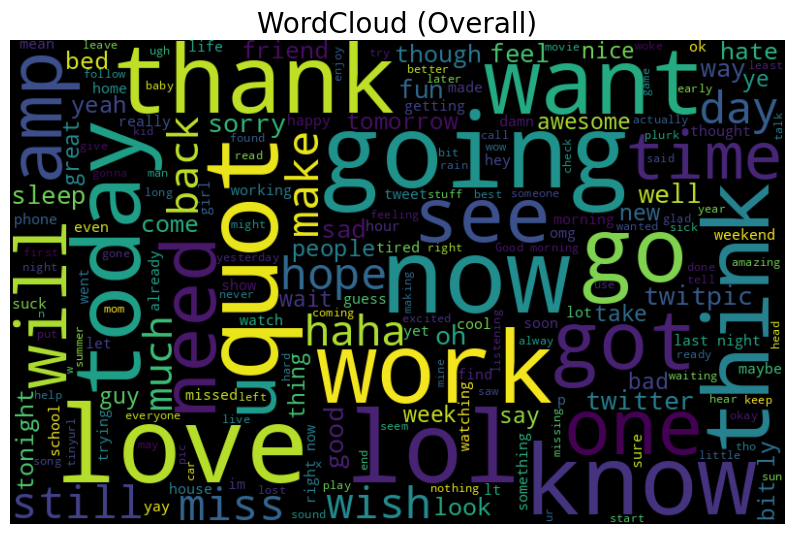

In [5]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


overall_words =' '.join([text for text in df['SentimentText']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(overall_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("WordCloud (Overall)", fontsize = 20)
plt.show()

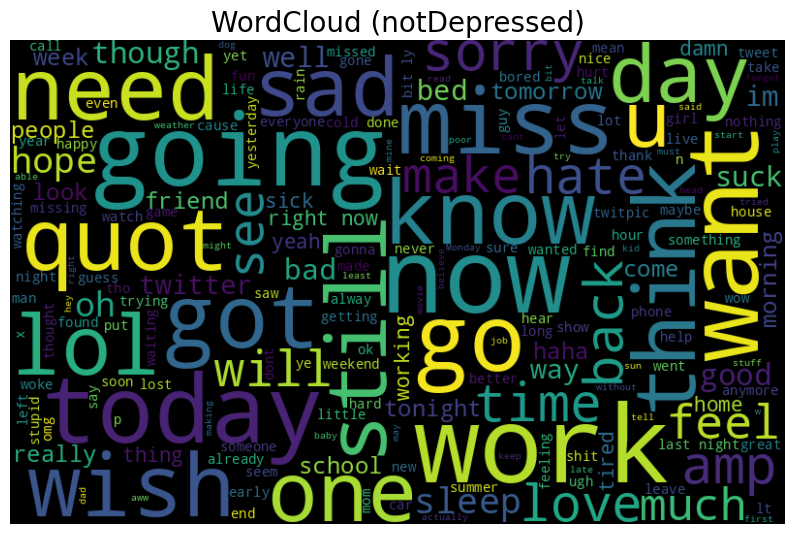

In [6]:
notDepressed_words =' '.join([text for text in df['SentimentText'][df['Sentiment']==0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(notDepressed_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("WordCloud (notDepressed)", fontsize = 20)
plt.show()

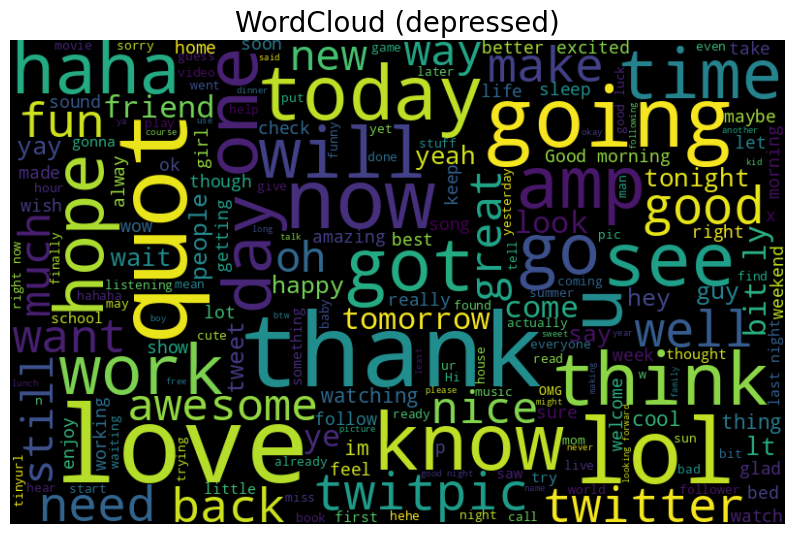

In [7]:
depressed_words =' '.join([text for text in df['SentimentText'][df['Sentiment']==1]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(depressed_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("WordCloud (depressed)", fontsize = 20)
plt.show()

In [11]:
df['sentenceLength']=df['tokenized'].str.len()
df

,ItemID,Sentiment,SentimentSource,SentimentText,punctuation,alphabet,lowercase,tokenized,sentenceLength
0,1,0,Sentiment140,is so sad for my APL frie...,is so sad for my APL frie...,is so sad for my APL frie...,is so sad for my apl frie...,"[is, so, sad, for, my, apl, friend]",7
1,2,0,Sentiment140,I missed the New Moon trail...,I missed the New Moon trail...,I missed the New Moon trail...,i missed the new moon trail...,"[i, missed, the, new, moon, trailer]",6
2,3,1,Sentiment140,omg its already 7:30 :O,omg its already 7:30 :O,omg its already O,omg its already o,"[omg, its, already, o]",4
3,4,0,Sentiment140,.. Omgaga. Im sooo im gunna CRy. I'...,.. Omgaga. Im sooo im gunna CRy. I'...,Omgaga Im sooo im gunna CRy I ...,omgaga im sooo im gunna cry i ...,"[omgaga, im, sooo, im, gunna, cry, i, ve, been...",23
4,5,0,Sentiment140,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me!!! ...,i think mi bf is cheating on me ...,i think mi bf is cheating on me ...,"[i, think, mi, bf, is, cheating, on, me, t, t]",10
...,...,...,...,...,...,...,...,...,...
1578607,1578623,1,Sentiment140,Zzzzzz.... Finally! Night tweeters!,Zzzzzz.... Finally! Night tweeters!,Zzzzzz Finally Night tweeters,zzzzzz finally night tweeters,"[zzzzzz, finally, night, tweeters]",4
1578608,1578624,1,Sentiment140,"Zzzzzzz, sleep well people","Zzzzzzz, sleep well people",Zzzzzzz sleep well people,zzzzzzz sleep well people,"[zzzzzzz, sleep, well, people]",4
1578609,1578625,0,Sentiment140,ZzzZzZzzzZ... wait no I have homework.,ZzzZzZzzzZ... wait no I have homework.,ZzzZzZzzzZ wait no I have homework,zzzzzzzzzz wait no i have homework,"[zzzzzzzzzz, wait, no, i, have, homework]",6
1578610,1578626,0,Sentiment140,"ZzZzzzZZZZzzz meh, what am I doing up again?","ZzZzzzZZZZzzz meh, what am I doing up again?",ZzZzzzZZZZzzz meh what am I doing up again,zzzzzzzzzzzzz meh what am i doing up again,"[zzzzzzzzzzzzz, meh, what, am, i, doing, up, a...",8


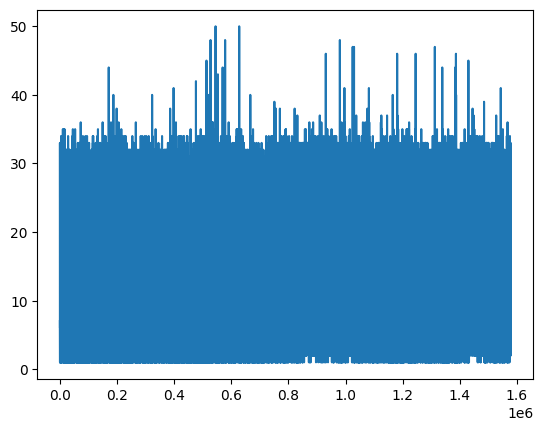

In [12]:
plt.plot(df['sentenceLength'][df.Sentiment==0]) #plot of positive tweet

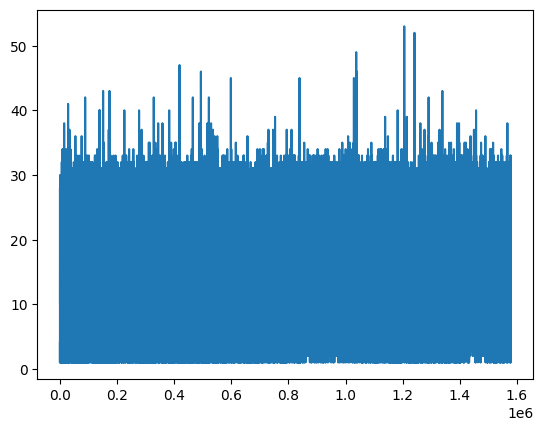

In [13]:
plt.plot(df['sentenceLength'][df.Sentiment==1]) #plot of negative tweet

In [14]:
df['positive_sentenceLength']=df['tokenized'].str.len()[df['Sentiment']==0]
df['negative_sentenceLength']=df['tokenized'].str.len()[df['Sentiment']==1]
df.loc[:, 'positive_sentenceLength'].mean()


14.104665571670461

In [15]:
df.loc[:, 'negative_sentenceLength'].mean()

13.15941111928087

Number of Positive Tweets  =  788435
Number of Negative Tweets =  790177


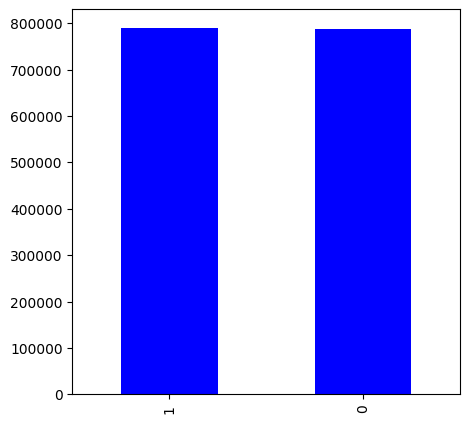

In [16]:
df['Sentiment'].value_counts().plot.bar(color = 'blue', figsize = (5,5))
print('Number of Positive Tweets  = ' ,len(df['Sentiment'][df.Sentiment == 0]))
print('Number of Negative Tweets = ' ,len(df['Sentiment'][df.Sentiment == 1]))

In [17]:
#positive tweet of max sentenceLength
df[df['sentenceLength']==df['sentenceLength'][df['Sentiment']==0].max()]


,ItemID,Sentiment,SentimentSource,SentimentText,punctuation,alphabet,lowercase,tokenized,sentenceLength,positive_sentenceLength,negative_sentenceLength
544997,545013,0,Sentiment140,2 ngï¿½y ngh? l?i s?p h?t Hï¿½m qua thï¿½ c? ...,2 ngï¿½y ngh? l?i s?p h?t Hï¿½m qua thï¿½ c? ...,ng y ngh l i s p h t H m qua th c ...,ng y ngh l i s p h t h m qua th c ...,"[ng, y, ngh, l, i, s, p, h, t, h, m, qua, th, ...",50,50.0,NaN
627761,627777,0,Sentiment140,ChÆ°a ká»‹p thá»Ÿ máº¡nh Ä‘Ã£ láº¡i nÃ­n thá»Ÿ...,ChÆ°a ká»‹p thá»Ÿ máº¡nh Ä‘Ã£ láº¡i nÃ­n thá»Ÿ...,Ch a k p th m nh l i n n th ...,ch a k p th m nh l i n n th ...,"[ch, a, k, p, th, m, nh, l, i, n, n, th, lao, ...",50,50.0,NaN


In [18]:
#negative tweet of max sentenceLength
df[df['sentenceLength']==df['sentenceLength'][df['Sentiment']==1].max()]

,ItemID,Sentiment,SentimentSource,SentimentText,punctuation,alphabet,lowercase,tokenized,sentenceLength,positive_sentenceLength,negative_sentenceLength
1205588,1205604,1,Sentiment140,Thriving Ivory's song &quot;Twilight&quot; &gt...,Thriving Ivory's song &quot;Twilight&quot; &gt...,Thriving Ivory s song quot Twilight quot gt...,thriving ivory s song quot twilight quot gt...,"[thriving, ivory, s, song, quot, twilight, quo...",53,NaN,53.0
